In [1]:
# -- mount google drive
# from google.colab import drive
# drive.mount("/content/drive")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sys

from scipy import optimize
# path_to_module = '/content/drive/MyDrive/Colab Notebooks/Microlensing/'
# sys.path.append(path_to_module)
# from Chebyshev import Chebyhev_coefficients
# from Chebyshev import eval

In [4]:

def u(t, u_0, t_0, t_E, R, psi, theta, P):
    u_t = ((u_0 + np.sin(psi)*R*np.sin(t*2*np.pi/P))**2 +((t-t_0)/(t_E) + np.sin(theta)*R*np.sin(t*2*np.pi/P))**2)**(0.5)
    return u_t

def A_u(u):
    A_t = (u**2 + 2)/(u*(u**2 + 4)**(.5))
    return A_t

def A_params(t, u_0, t_0, t_E):
    A_t = (u(t, u_0, t_0, t_E)**2 + 2)/(u(t, u_0, t_0, t_E)*(u(t, u_0, t_0, t_E)**2 + 4)**(.5))
    return A_t

#blening paramater
def F(f_s, A):
    F_t = f_s*A+(1-f_s)
    return F_t



def A_binary_maker(t, t_0, u_0, t_E, P, R, binary_flux_ratio):
  phi = t*2*np.pi/P
  u_cm = np.sqrt(u_0**2 + ((t-t_0)/(t_E))**2)
  u1 = np.sqrt((u_0+R*np.sin(phi))**2 + (((t-t_0)/(t_E))+R*np.cos(phi))**2)
  u2 = np.sqrt((u_0-R*np.sin(phi))**2 + (((t-t_0)/(t_E))-R*np.cos(phi))**2)
  A1_binary = A_u(u1)
  A2_binary = A_u(u2)
  A1_coeff = 1/(1+binary_flux_ratio)
  A2_coeff = 1-A1_coeff
  A_binary = A1_coeff*A1_binary + A2_coeff*A2_binary
  A_cm = A_u(u_cm)
  return A_binary, A_cm

In [21]:
t_0 = 50
t = np.linspace(-500, 500, 5000)
u_0 = 0.1
t_E = 173.145684
f_s = 1 #fraction of source light
binary_flux_ratio = 0.1
P = 102.592648 # days
xiE = 0.4 # in units of Einstein radius
inclination=0
phi_0 = 0 #Phase at t0
q = 71.428571

In [28]:
# phi = 2*np.pi*(t - t_0)/P + phi_0
# u_cm = np.sqrt(u_0**2 + ((t-t_0)/(t_E))**2)

a1 = (q/(1+q)) * R     # primary's orbital radius
a2 = (1/(1+q)) * R
u1 = np.sqrt((u_0 + a1*np.sin(phi))**2 + (((t-t_0)/t_E) + a1*np.cos(phi))**2)
u2 = np.sqrt((u_0 - a2*np.sin(phi))**2 + (((t-t_0)/t_E) - a2*np.cos(phi))**2)
A1_binary = A_u(u1)
A2_binary = A_u(u2)
A1_coeff = 1/(1+binary_flux_ratio)
A2_coeff = 1-A1_coeff
A_binary2 = A1_coeff*A1_binary + A2_coeff*A2_binary

In [32]:
Omega = 2*np.pi*(t - t_0)/P + phi_0
u_cm = np.sqrt(u_0**2 + ((t-t_0)/(t_E))**2)
# q = 0.5
a1 = q/(1+q)     # primary's orbital radius
a2 = -1/(1+q) 
tau = ((t-t_0)/t_E)
delta_tau = xiE*(np.cos(Omega)-np.cos(phi_0))
delta_beta = xiE*(np.sin(Omega)-np.sin(phi_0))
u1 = np.sqrt((u_0 + a1*delta_beta)**2 + (tau + a1*delta_tau)**2)
u2 = np.sqrt((u_0 + a2*delta_beta)**2 + (tau + a2*delta_tau)**2)
A1_binary = A_u(u1)
A2_binary = A_u(u2)
A1_coeff = 1/(1+binary_flux_ratio)
A2_coeff = 1-A1_coeff
# A_binary = A1_coeff*A1_binary + A2_coeff*A2_binary
A_binary = A1_binary + binary_flux_ratio*A2_binary

In [33]:
# A_binary, A_cm = A_binary_maker(t, t_0, u_0, t_E, P, R, binary_flux_ratio)
F_binary1 = F(f_s, A_binary)
F_binary2 = F(f_s, A_binary2)
# F_cm = F(f_s, A_cm)

In [28]:
# path = '/content/drive/MyDrive/Colab Notebooks/Microlensing/Events_binary/'

In [29]:
# np.savez(path+'Event_CS_1.npz', time_sim=t, A=F_binary)

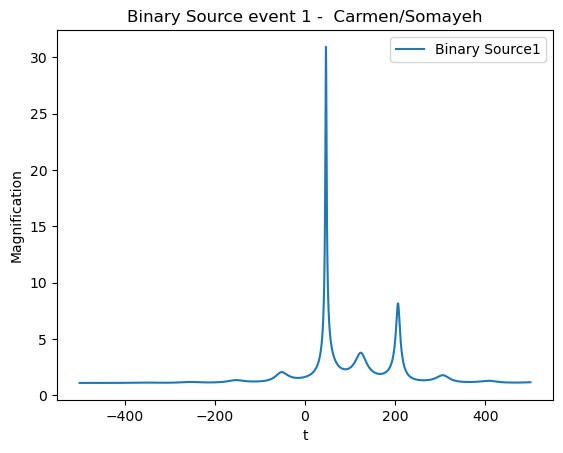

In [34]:
# %matplotlib widget
plt.figure()
plt.plot(t, F_binary1, label='Binary Source1')
# plt.plot(t, F_binary2, label='Binary Source2')
# plt.plot(t-t_0, F_cm, label='PSPL')

plt.legend()

plt.ylabel('Magnification')
plt.xlabel('t')
# plt.xlim(40, 60)
plt.title('Binary Source event 1 -  Carmen/Somayeh')
# plt.savefig(path+'CS_5.png')
plt.show()

In [ ]:
# Read Anibal's light curves
path = '/content/drive/MyDrive/Colab Notebooks/Microlensing/Events_binary/'
lc = np.load(path+ 'Event_4.npz')

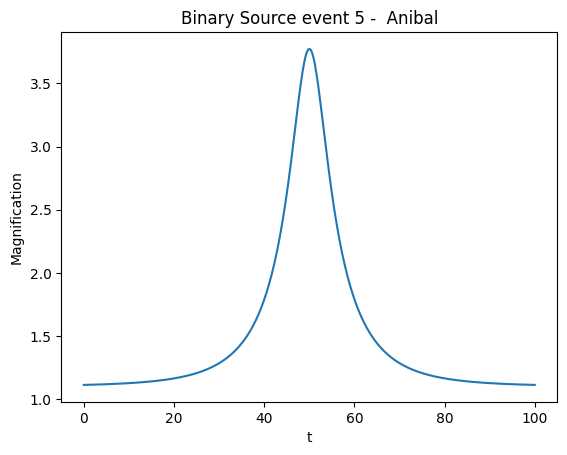

In [ ]:
plt.plot(lc['time_sim'], lc['A'])
plt.ylabel('Magnification')
plt.xlabel('t')
# plt.xlim(40, 60)
plt.title('Binary Source event 5 -  Anibal')
plt.savefig(path+'A_5.png')

plt.show()